In [34]:
models= ["cnn_lenet", "mlp4", "cnn_vgg", "lstm1v0", "lstm1", "lstm2", "blstm1", "blstm2", "lstm_fcn", "cnn_resnet"]

In [35]:
import pandas as pd

results = [pd.read_pickle(f'results_{model}_aug_noscale.pickle') for model in models]

In [36]:
import numpy as np

In [37]:
lengths = [len(r) for r in results]

In [38]:
print(lengths)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [39]:
model_column = np.concatenate([[model] * 10 for model in models])

In [40]:
np.mean(results,1)

array([[4.89948459, 2.21087983, 1.6903001 , 1.36571155, 0.60084112],
       [5.83591394, 2.41303504, 1.82358339, 1.40458606, 0.52589232],
       [5.20960317, 2.28116009, 1.77926568, 1.44239887, 0.57620241],
       [5.14384251, 2.26622565, 1.78541542, 1.45139229, 0.5805766 ],
       [4.57661204, 2.13845496, 1.67236396, 1.35873015, 0.6266766 ],
       [5.06129985, 2.24752269, 1.7466059 , 1.41456768, 0.58703405],
       [4.5414855 , 2.12934   , 1.65328841, 1.33267614, 0.62859339],
       [4.52301631, 2.12261826, 1.65305859, 1.35328958, 0.63191361],
       [4.36197228, 2.08805726, 1.63526651, 1.35365762, 0.64427938],
       [4.36183934, 2.08789325, 1.62431957, 1.32956951, 0.64487298]])

In [41]:
np.array(results[0]).shape

(10, 5)

In [42]:
results_data = pd.DataFrame(np.array(results).reshape(-1, 5), columns=["MSE", "RMSE", "MAE", "MAD", "R2"])

In [43]:
results_data["model"] = model_column

In [44]:
melted = pd.melt(results_data, id_vars=["model"])

In [45]:
import seaborn as sns

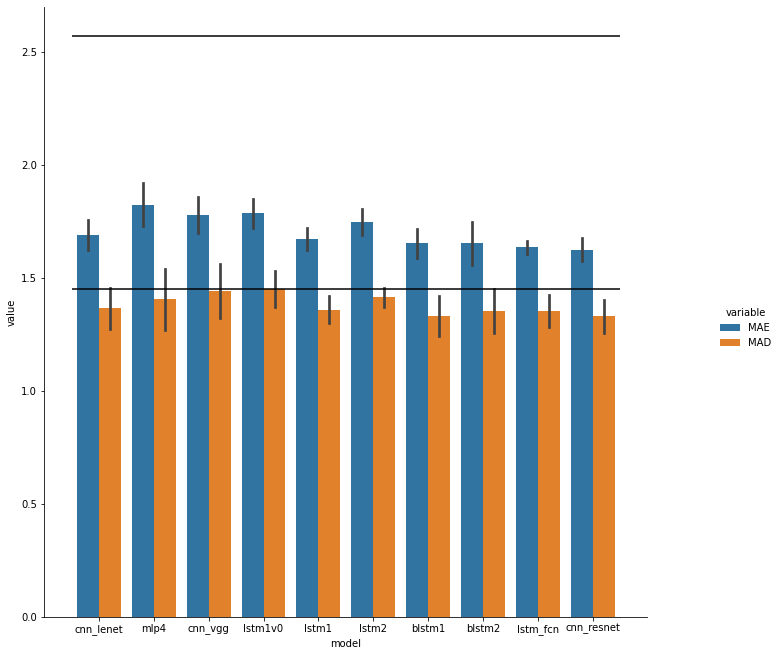

In [46]:
ff = sns.catplot(data=melted[(melted["variable"]=="MAE") | (melted["variable"]=="MAD")], kind="bar", ci="sd", y="value", hue="variable", x="model")
ff.figure.set_size_inches([12, 10])
xlims = ff.axes[0][0].get_xlim()
ff.axes[0][0].hlines(1.45, *xlims, 'k')
ff.axes[0][0].hlines(2.57, *xlims, 'k')
# ff.axes[0][0].hlines(2.89, *xlims, 'k')

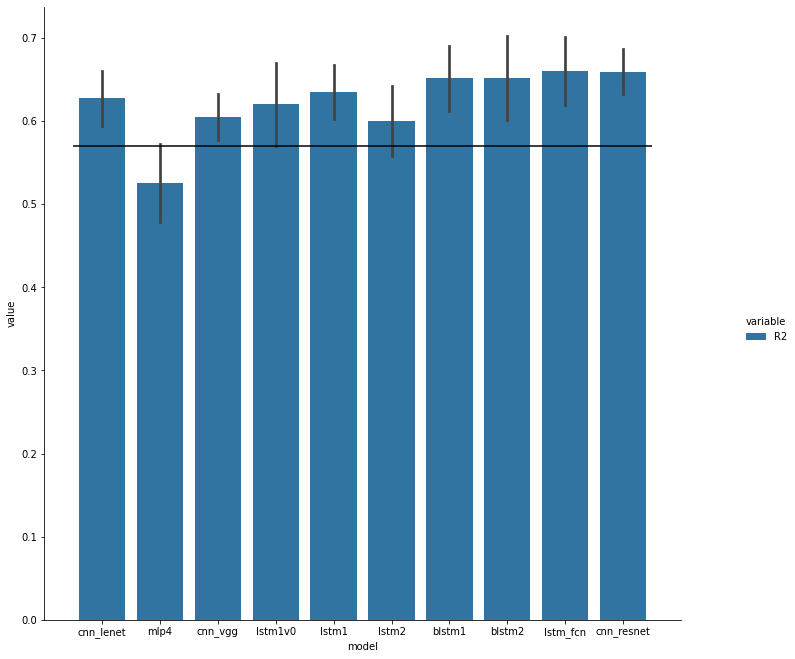

In [30]:
ff = sns.catplot(data=melted[melted["variable"]=="R2"], kind="bar", ci="sd", y="value", hue="variable", x="model")
ff.figure.set_size_inches([12, 10])
ff.axes[0][0].hlines(0.57, *ff.axes[0][0].get_xlim(), 'k')

In [15]:
# Choose different train/test split in every experiment
# Run all architectures with each train/test split
# Compute the median absolute error (!) instead / in addition to mean 
# Compute coefficient of determination 
# BLSTM with FCN? 
# Control experiments with SGL or LASSO PCR: what's the generalization profile of these algorithms?
# 
# Run basic experiment with/without augmentation
# Run generalization experiments with/without augmentation
